In [102]:
import numpy as np
import xarray as xr
from numpy import ma
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature
import pandas as pd
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd
from scipy import interpolate
import seaborn as sns

from MapXtremePCIC import MapXtremePCIC

In [2]:
PATH = './data/pr_24hr_50yrs/'

MapXtreme = MapXtremePCIC('110m', 'eof', PATH, 'pr')
data_cube = MapXtreme.load_data

In [3]:
dfo = MapXtremePCIC.sample(MapXtreme, frac = 1, seed = 7, dropna = True)
y_g = dfo.sample(frac = 0.02)

In [4]:
y_g['obs_y'] = y_g['run1'].values
df = pd.concat([y_g['obs_y'], dfo], axis=1).dropna()

y_g_arr = df['obs_y'] - df['obs_y'].mean()

In [143]:
df['frac_area'] = df['areas']/df['areas'].sum()
dfo['frac_area'] = dfo['areas']/dfo['areas'].sum()

mean = df['obs_y'].mean()

X_arr = MapXtremePCIC.get_arr(MapXtreme, df)[2]
Xo_arr = MapXtremePCIC.get_arr(MapXtreme, dfo)[2]

Xp = X_arr - X_arr.mean(axis=0)
Xpo = Xo_arr - Xo_arr.mean(axis=0)

W = np.diag(df['frac_area'].values)
Wo = np.diag(dfo['frac_area'].values)

X = np.matmul(Xp, W)
Xo = np.matmul(Xpo, Wo)

y_w = np.matmul(y_g_arr, W)

[[-0.24373803  0.54258817 -0.05443871 ... -0.37585095 -0.05084747
   0.2449978 ]
 [ 0.24717563 -0.46343564  0.55183945 ... -0.31246477  0.06262115
   0.71636206]
 [ 0.38109927 -0.44464342 -0.12132938 ... -0.04198927  0.114817
  -0.07048508]
 ...
 [-0.26188217  0.13434756  0.34482945 ... -0.25794336  0.32881588
  -0.16669983]
 [-0.23900829 -0.3396869   0.01646379 ... -0.08680683 -0.33265808
  -0.18306066]
 [-0.299434    0.22716317  0.0780188  ... -0.13616457  0.00834063
  -0.72252941]] [[-0.24373803  0.54258817 -0.05443871 ... -0.37585095 -0.05084747
   0.2449978 ]
 [ 0.24717563 -0.46343564  0.55183945 ... -0.31246477  0.06262115
   0.71636206]
 [ 0.38109927 -0.44464342 -0.12132938 ... -0.04198927  0.114817
  -0.07048508]
 ...
 [-0.26188217  0.13434756  0.34482945 ... -0.25794336  0.32881588
  -0.16669983]
 [-0.23900829 -0.3396869   0.01646379 ... -0.08680683 -0.33265808
  -0.18306066]
 [-0.299434    0.22716317  0.0780188  ... -0.13616457  0.00834063
  -0.72252941]]


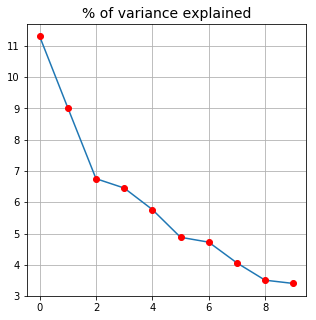

(35, 177) (27, 177)
(8843,) (35, 8843)


In [146]:
skpca = pca.PCA()
skpca.fit(X)

skpcao = pca.PCA()
skpcao.fit(Xo)

f, ax = plt.subplots(figsize=(5,5))
ax.plot(skpca.explained_variance_ratio_[0:10]*100)
ax.plot(skpca.explained_variance_ratio_[0:10]*100,'ro')
ax.set_title("% of variance explained", fontsize=14)
ax.grid()
plt.show()

ipc = np.where(skpca.explained_variance_ratio_.cumsum() >= 0.95)[0][0]

EOFs = skpca.components_

EOFs = EOFs[:ipc, :]

print(X.shape, EOFs.shape)

# reconstruct the field map
x = EOFs[0, :]
y = y_w
#print(x.shape)
f = interpolate.interp1d(x, y)

# reconstruct observed field from this interpolation
X_new = f(Xo[0, :])
print(X_new.shape, Xo.shape)

#plt.hist(np.hstack(y_g_arr))
#plt.hist(np.hstack(X_new))
#sns.distplot(np.hstack(X_new))
#sns.distplot(np.hstack(y))

In [152]:
dfo['eof'] = np.dot(X_new, Wo[0, :].T) + Xo_arr.mean(axis=0)

In [153]:
dfo['eof']

6292     6.900802
13657    4.608942
15884    2.662438
14171    2.500490
14608    2.308192
4333     2.438369
7499     5.305243
5672     1.927254
7308     2.602365
11486    3.659587
14855    2.842136
15912    2.125212
11784    3.347696
11894    4.248562
16974    1.530968
17488    1.771191
9849     5.138049
17218    1.907534
15287    3.905879
16969    1.660321
4634     2.506742
3309     3.797290
15141    3.764202
11172    4.189696
9693     5.171586
7058     5.498894
16373    1.584101
16033    2.447551
3757     3.659620
1009     3.825012
           ...   
14160    2.308745
11804    3.839469
12776    3.861680
1309     3.778122
15313    2.595121
16160    1.800760
11972    4.127914
17554    1.540135
10763    3.994666
7732     2.174178
4352     4.954302
9231     5.219996
8551     6.806109
16698    3.033082
16189    2.491109
14995    3.094685
17678    1.655700
12696    3.438443
4939     3.649234
4188     3.313766
12914    3.067937
8096     5.045493
10122    4.875147
7005     2.305883
15941    2

In [154]:
#N = np.dot(dfo['eof'].values, np.linalg.inv(Wo))

In [155]:
N_n = (N + df['obs_y'].mean())

SyntaxError: unexpected character after line continuation character (<ipython-input-156-d6485fecff8c>, line 1)

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

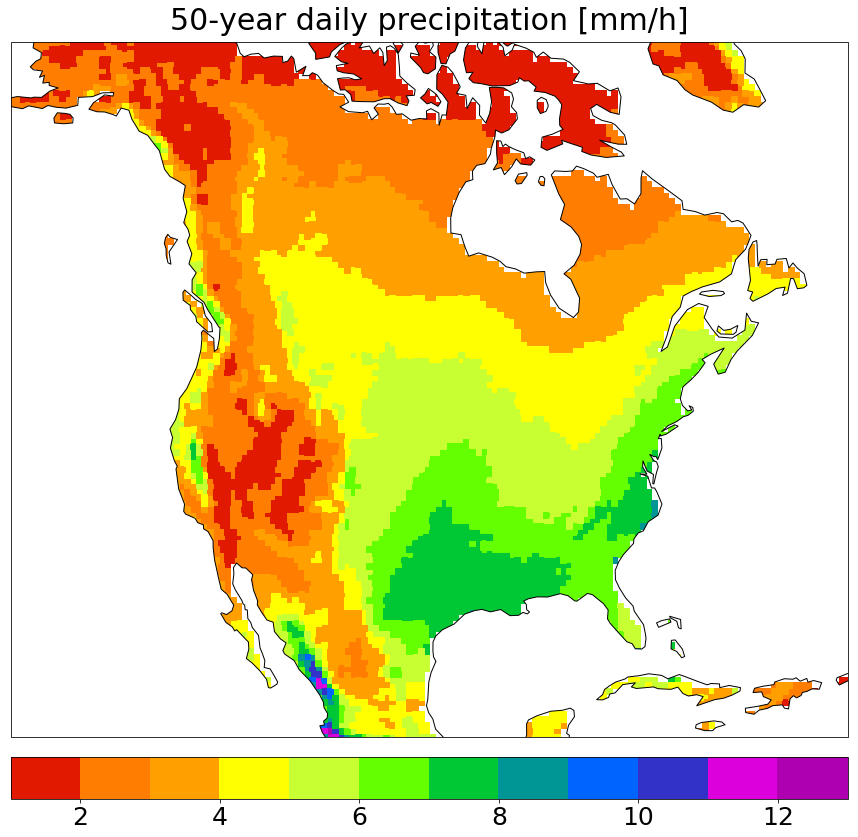

In [158]:
rp = MapXtremePCIC.rp()
ocean = MapXtremePCIC.ocean_mask('110m')
cmap = MapXtremePCIC.color_pallette()

plt.figure(figsize = (15, 15))

rlon = dfo['rlon']
rlat = dfo['rlat']
N = dfo['eof']

# define projections
ax = plt.axes(projection=rp)#ccrs.PlateCarree())
ax.set_title('50-year daily precipitation [mm/h]', fontsize=30, verticalalignment='bottom')
ax.add_feature(ocean, zorder=2)

# plot design values with custom colormap
colorplot = ax.scatter(rlon, rlat, c = N, marker='s', cmap=cmap, vmin=1., vmax=13.)
cbar = plt.colorbar(colorplot, ax=ax, orientation="horizontal", fraction=0.07, pad=0.025)
cbar.ax.tick_params(labelsize=25)

# constrain to data
plt.xlim(rlon.min(), rlon.max())
plt.ylim(rlat.min(), rlat.max())

# return/undo the supress invalid warning
np.seterr(invalid = 'warn')

In [184]:
dfo_fine = dfo[['rlat', 'rlon', 'eof']].sort_values(by=['rlat', 'rlon']).copy()

In [201]:
dfo_resampled = pd.DataFrame()


dlon = np.diff(data_cube['rlon'].values).mean()
dlat = np.diff(data_cube['rlat'].values).mean()

dfo_resampled['rlat'] = np.tile(dfo_fine['rlat'].values, 100)
dfo_resampled['rlon'] = np.tile(dfo_fine['rlon'].values, 100)

N = 100

def resample(row, i, N):
    row['rlon']+i*dlon/N
    
for i in range(0, N):
    dfo_resampled['rlon'].apply(lambda x: x+i*dlon/N)
    dfo_resampled['rlat'].apply(lambda x: x+i*dlat/N)    

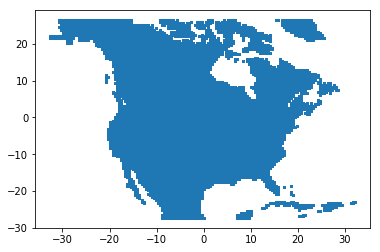

In [203]:
plt.scatter(dfo_resampled['rlon'], dfo_resampled['rlat'], s=0.5)

In [179]:
dfo_resampled['rlat'] = np.tile(dfo_fine['rlat'].values, 100)
dfo_resampled['rlon'] = np.tile(dfo_fine['rlon'].values, 100)

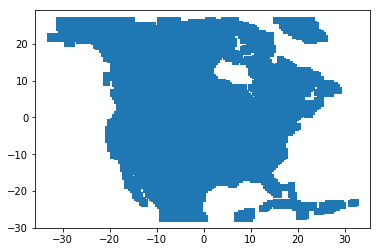

In [177]:
dfo_resampled
plt.scatter(dfo_resampled['rlon'], dfo_resampled['rlat'], marker = 's')